In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import scipy.stats as stats
import pylab

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data loading
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# data description
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## normalization and standarisation
### 1. Standartization

In [6]:
titanic_sample = titanic[['Pclass','Age','Fare']]
titanic_sample.head()

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


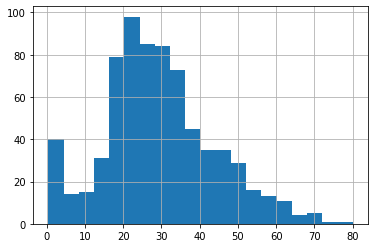

In [10]:
titanic_sample.Age.hist(bins = 20)
plt.show()

In [13]:
titanic_sample.Age.fillna(titanic_sample.Age.median(), inplace = True)

c:\users\jeorv\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# scallling with scikit-Learn
# 1. create the object.
# 2. Fit the object to the data
# 3. Transform the data

# 1.object creation
scaler = StandardScaler()

# 2. scaler fitting on the data
scaler.fit(titanic_sample)

# 3. Data transformation
titanic_sample_stdscaler = scaler.transform(titanic_sample)

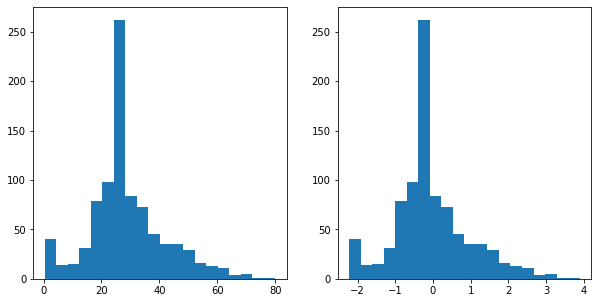

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(titanic_sample.Age, bins = 20)
ax2.hist(titanic_sample_stdscaler[:,1], bins = 20)
plt.show()

In [23]:
print("Mean: \n", titanic_sample_stdscaler.mean(axis = 0))
print("Std Dev: \n", titanic_sample_stdscaler.std(axis = 0))
print("Max: \n", titanic_sample_stdscaler.min(axis = 0))
print("Min: \n", titanic_sample_stdscaler.max(axis = 0))

Mean: 
 [-8.77213254e-17  2.27277979e-16  3.98733297e-18]
Std Dev: 
 [1. 1. 1.]
Max: 
 [-1.56610693 -2.22415608 -0.64842165]
Min: 
 [0.82737724 3.89155445 9.66716653]


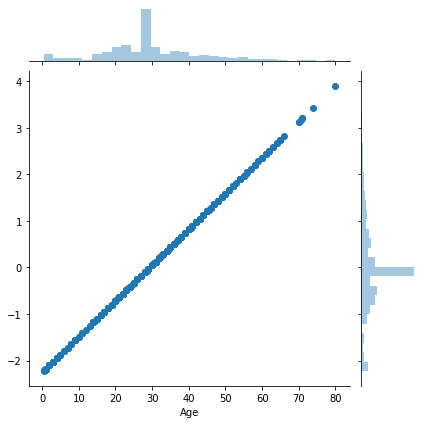

In [27]:
sns.jointplot(titanic_sample.Age, titanic_sample_stdscaler[:,1])

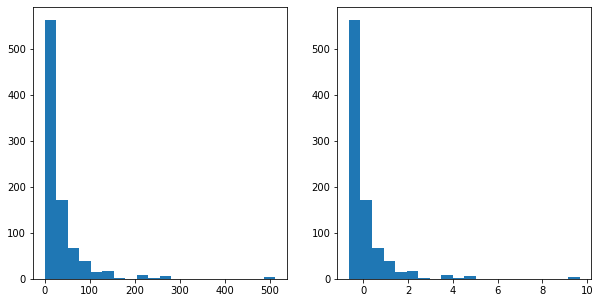

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(titanic_sample.Fare, bins = 20)
ax2.hist(titanic_sample_stdscaler[:,2], bins = 20)
plt.show()

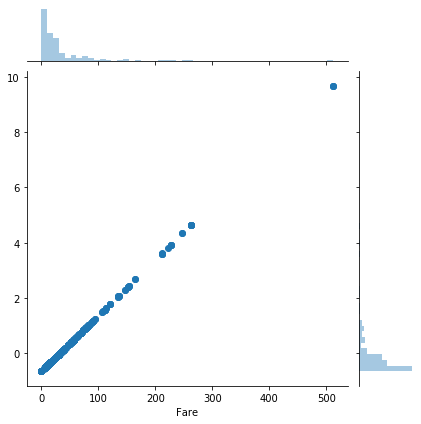

In [30]:
sns.jointplot(titanic_sample.Fare, titanic_sample_stdscaler[:,2])

In [31]:
## 2. Min-Max Normalization

scaler = MinMaxScaler()
scaler.fit(titanic_sample)
titanic_sample_minmax = scaler.transform(titanic_sample)

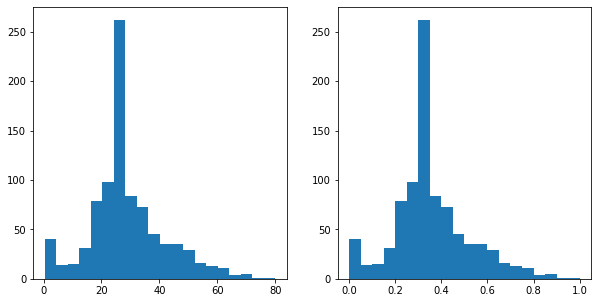

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(titanic_sample.Age, bins = 20)
ax2.hist(titanic_sample_minmax[:,1], bins = 20)
plt.show()

In [35]:
print("Mean: \n", titanic_sample_minmax.mean(axis = 0))
print("Std Dev: \n", titanic_sample_minmax.std(axis = 0))
print("Max: \n", titanic_sample_minmax.max(axis = 0))
print("Min: \n", titanic_sample_minmax.min(axis = 0))

Mean: 
 [0.65432099 0.3636791  0.06285843]
Std Dev: 
 [0.41780097 0.1635133  0.09694067]
Max: 
 [1. 1. 1.]
Min: 
 [0. 0. 0.]


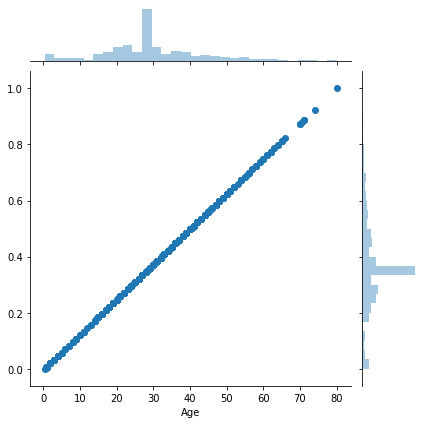

In [34]:
sns.jointplot(titanic_sample.Age, titanic_sample_minmax[:,1])

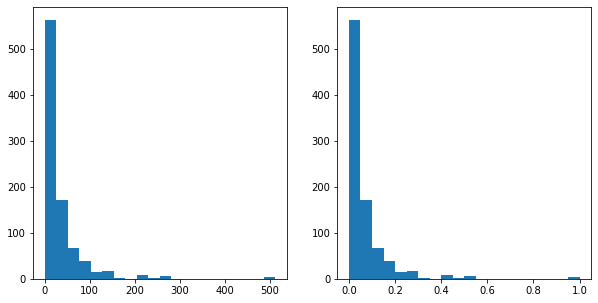

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(titanic_sample.Fare, bins = 20)
ax2.hist(titanic_sample_minmax[:,2], bins = 20)
plt.show()

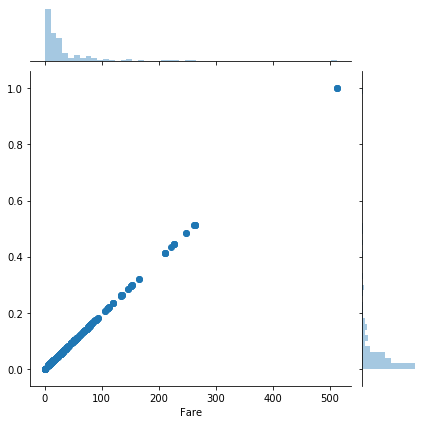

In [37]:
sns.jointplot(titanic_sample.Fare, titanic_sample_minmax[:,2])

### 3. Robust(Median and IQR)


In [38]:
scaler = RobustScaler()
scaler.fit(titanic_sample)
titanic_sample_robust = scaler.transform(titanic_sample)

In [49]:
print("Mean: \n", titanic_sample_robust.mean(axis = 0))
print("Median: \n", np.median(titanic_sample_robust, axis = 0))
print("Std Dev: \n", titanic_sample_robust.std(axis = 0))
print("Max: \n", titanic_sample_robust.max(axis = 0))
print("Min: \n", titanic_sample_robust.min(axis = 0))

Mean: 
 [-0.69135802  0.10473711  0.76874471]
Median: 
 [0. 0. 0.]
Std Dev: 
 [0.83560193 1.00095294 2.15099155]
Max: 
 [ 0.         4.        21.5627382]
Min: 
 [-2.         -2.12153846 -0.62600478]


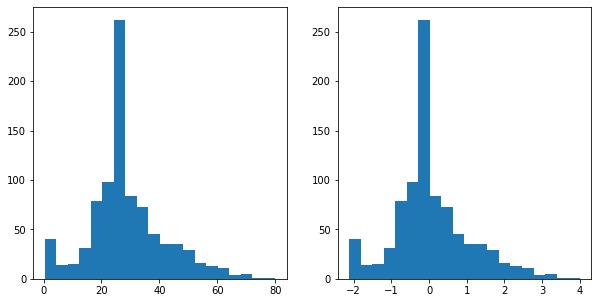

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(titanic_sample.Age, bins = 20)
ax2.hist(titanic_sample_robust[:,1], bins = 20)
plt.show()

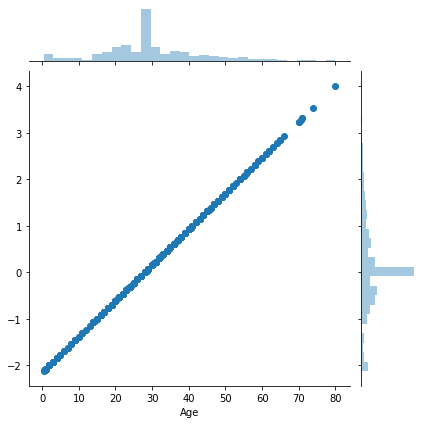

In [41]:
sns.jointplot(titanic_sample.Age, titanic_sample_robust[:,1])

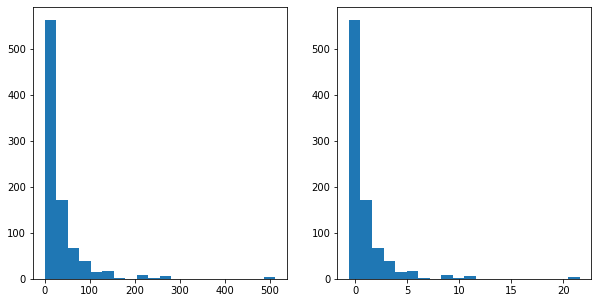

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(titanic_sample.Fare, bins = 20)
ax2.hist(titanic_sample_robust[:,2], bins = 20)
plt.show()

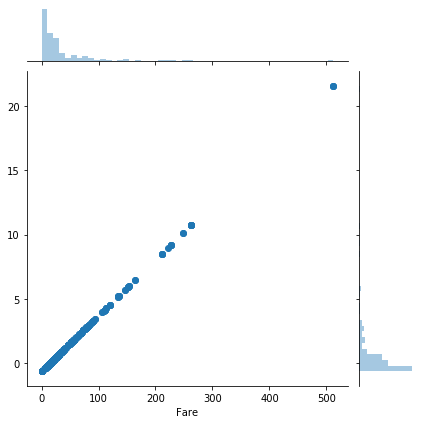

In [50]:
sns.jointplot(titanic_sample.Fare, titanic_sample_robust[:,2])

In [53]:
### 4. Gaussian transformation
def qq_plots(df, variable):
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist = 'norm', plot = pylab)
    
    plt.show()

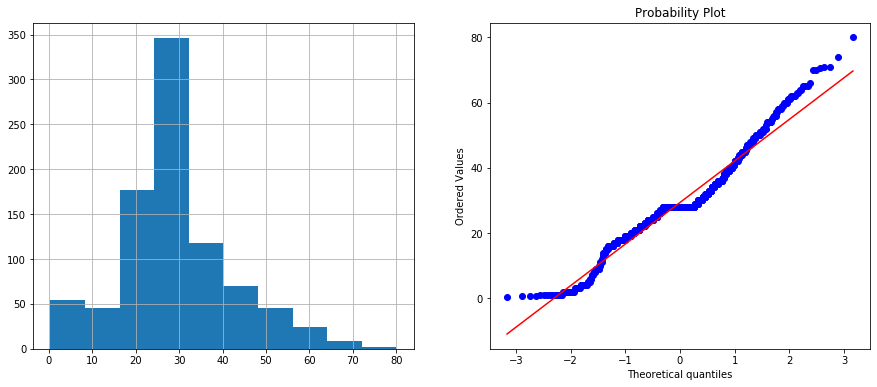

In [54]:
qq_plots(titanic_sample, "Age")